<h1> Import the necessary libraries.</h1>

In [1]:
from os import listdir
import scipy.spatial.distance as dist
from matplotlib import image
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

<h1>Visualization the data</h1>

In [2]:
dataTrain=pd.read_csv("ImageMiningColle/training.csv" , delimiter=';')
dataTest_utilisantMasque=pd.read_csv("ImageMiningColle/test_utilisantMasque.csv" ,delimiter=';') 
dataTest_ImageEntiere=pd.read_csv("ImageMiningColle/test_ImageEntiere.csv"  ,delimiter=';')

In [3]:
dataTrain.head(8)

,ImageName,Label
0,IMD002,Non-Melanoma
1,IMD003,Non-Melanoma
2,IMD004,Non-Melanoma
3,IMD008,Non-Melanoma
4,IMD009,Non-Melanoma
5,IMD010,Non-Melanoma
6,IMD013,Non-Melanoma
7,IMD014,Non-Melanoma


In [4]:
img_original = image.imread('ImageMiningColle\\Training\\Dermoscopic_Image\\IMD002.bmp')
img_masque = image.imread('ImageMiningColle\\Training\\Masques\\IMD002_lesion.bmp')
#plt.imshow(img_original) 

Text(0.5, 1.0, 'image IMD002_lesion Masque ')

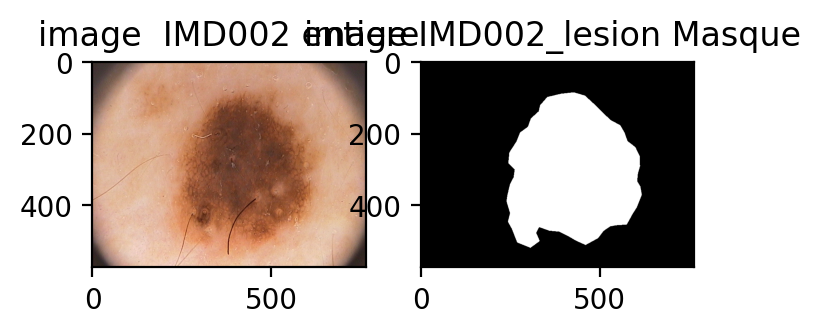

In [5]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6, 7), dpi=200)

ax1 = fig.add_subplot(3, 3, 1)
ax1.imshow(img_original)
ax1.set_title('image  IMD002 entiere')

ax1 = fig.add_subplot(3, 3, 2)
ax1.imshow(img_masque)
ax1.set_title('image IMD002_lesion Masque ')

<AxesSubplot:>

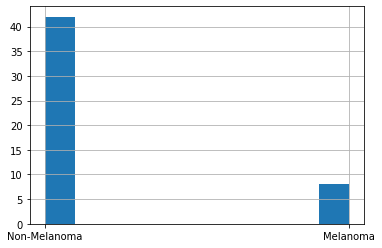

In [6]:
dataTrain.Label.hist()

<h1>Prepare the data</h1>

In [7]:
from os import listdir
from matplotlib import image
loaded_images = list()

path='ImageMiningColle\\Training\\Dermoscopic_Image'
nameImages=[]
i=0
for filename in listdir(path):
    if i !=0 :
        img_data = image.imread(path+'/' + filename)
        loaded_images.append(img_data)
        
        nameImages.append(path+'/' + filename)
        
        print(' %s %s ' % (filename, img_data.shape))
    i=i+1

 IMD002.bmp (572, 765, 3) 
 IMD003.bmp (574, 765, 3) 
 IMD004.bmp (574, 765, 3) 
 IMD008.bmp (576, 766, 3) 
 IMD009.bmp (575, 766, 3) 
 IMD010.bmp (573, 765, 3) 
 IMD013.bmp (573, 765, 3) 
 IMD014.bmp (573, 765, 3) 
 IMD015.bmp (573, 765, 3) 
 IMD016.bmp (573, 765, 3) 
 IMD017.bmp (572, 764, 3) 
 IMD019.bmp (574, 764, 3) 
 IMD020.bmp (574, 764, 3) 
 IMD021.bmp (572, 765, 3) 
 IMD022.bmp (573, 765, 3) 
 IMD023.bmp (572, 764, 3) 
 IMD024.bmp (573, 765, 3) 
 IMD025.bmp (577, 769, 3) 
 IMD027.bmp (574, 765, 3) 
 IMD030.bmp (553, 763, 3) 
 IMD031.bmp (572, 762, 3) 
 IMD032.bmp (570, 761, 3) 
 IMD033.bmp (571, 761, 3) 
 IMD035.bmp (575, 766, 3) 
 IMD036.bmp (575, 763, 3) 
 IMD037.bmp (574, 765, 3) 
 IMD038.bmp (575, 764, 3) 
 IMD039.bmp (572, 764, 3) 
 IMD040.bmp (572, 766, 3) 
 IMD041.bmp (572, 764, 3) 
 IMD042.bmp (572, 765, 3) 
 IMD043.bmp (573, 765, 3) 
 IMD044.bmp (574, 761, 3) 
 IMD045.bmp (573, 765, 3) 
 IMD047.bmp (573, 765, 3) 
 IMD048.bmp (575, 767, 3) 
 IMD049.bmp (576, 767, 3) 
 

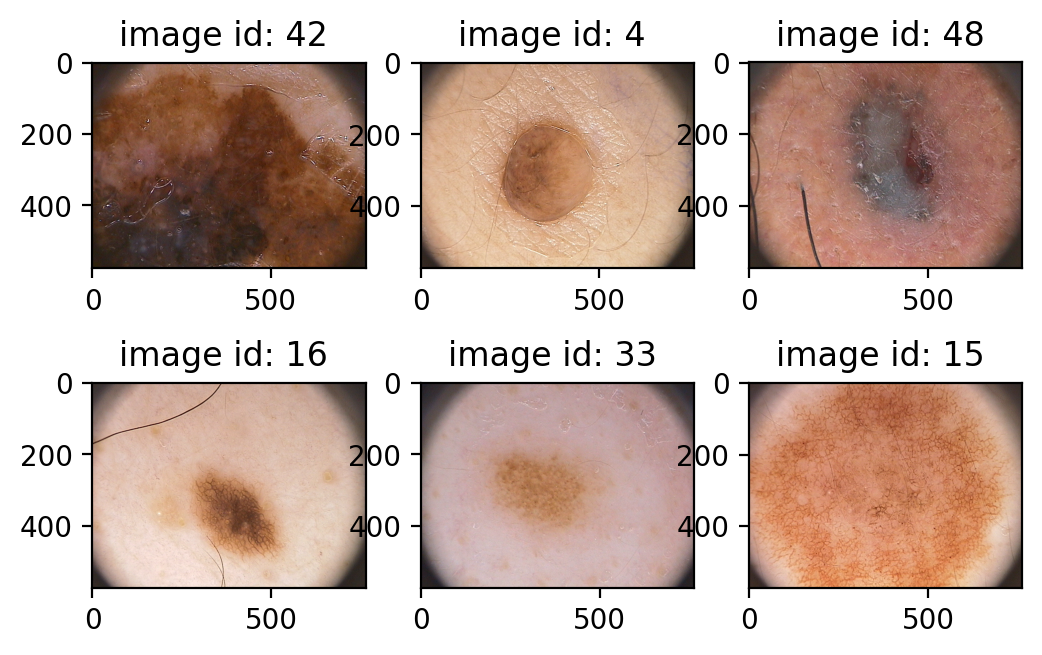

In [8]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6, 6), dpi=200)
import random
id=random.sample(range(len(loaded_images)), 6)
for i in range(6):
  ax1 = fig.add_subplot(3, 3, i+1)
  ax1.imshow(loaded_images[id[i]])
  ax1.set_title('image id: %s '% (id[i]))

In [9]:
#loaded_images[0]

<h1>Feature by color</h1>

In [10]:
def color_Moments(img):
    colorFeatures = []
    for i in range(3):
        colorFeatures.append(np.mean(img[:, :, i]))
        colorFeatures.append(np.std(img[: , :, i]))
    
    return colorFeatures

#----------------------------------------------------------------------------------------------

def getHsvHistogramFeatures(img):
    
    img_hsv=cv2.cvtColor(img,cv2.COLOR_RGB2HSV)
    hist_hsv=cv2.calcHist(img_hsv,[0,1,2],None,[8,2,2],[0,360,0,255,0,255]) #il retourn un matrice de dimention 1x(8x2x2 =32)=>1x32
    return hist_hsv.flatten()

#--------------------------------------------------------------------------------------


In [11]:
#Dim de vecteur caractéristique :38 et 50 image 

#np.shape(Concatenate_two_vectors())

In [12]:
#Concatenate_two_vectors()[0]

<h1>Form </h1>

In [13]:
def extractionMoments(img_originale):
    img_gray = cv2.cvtColor(img_originale, cv2.COLOR_BGR2GRAY)
    _,img=cv2.threshold(img_gray, 130, 255, cv2.THRESH_BINARY )
    
    moments = cv2.HuMoments(cv2.moments(img)).flatten()
    #print("ORIGINAL MOMENTS: {}".format(moments
    return moments

#------------------------------------------------------------------------

import math

def increaseValueMoments(moments):
    for i in range(0,7):
        moments[i] = -1* math.copysign(1.0, moments[i]) * math.log10(abs(moments[i]))
        #cv2.imwrite("ib.png",img)
    return moments

#-----------------------------------------------------------------------------

def getFeaturesShape(img):
        
    moments=extractionMoments(img)
    moments=increaseValueMoments(moments)
        
        #featuresMoments.append(moments)
    return moments

#-----------------------------------------------------------------------------



<h1>texture</h1>

In [14]:
from skimage.feature import greycomatrix, greycoprops
from skimage import io, color, img_as_ubyte
import cv2

In [15]:
def contrast_feature(matrix_coocurrence):
    contrast = greycoprops(matrix_coocurrence, 'contrast')
    return contrast

def homogeneity_feature(matrix_coocurrence):
    homogeneity = greycoprops(matrix_coocurrence, 'homogeneity')
    return  homogeneity

def energy_feature(matrix_coocurrence):
    energy = greycoprops(matrix_coocurrence, 'energy')
    return  energy

def correlation_feature(matrix_coocurrence):
    correlation = greycoprops(matrix_coocurrence, 'correlation')
    return  correlation


def entropy_feature(matrix_coocurrence):
    entropy = greycoprops(matrix_coocurrence, 'entropy')
    return  entropy

In [16]:
def getFeaturesTextur(img):
    freaturesTexturs=[]
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    matrix_coocurrence = greycomatrix(gray, [1], [0], levels=256, normed=False, symmetric=False) 
    
    freaturesTexturs.append(contrast_feature(matrix_coocurrence)[0][0])
    freaturesTexturs.append(homogeneity_feature(matrix_coocurrence)[0][0])
    freaturesTexturs.append(energy_feature(matrix_coocurrence)[0][0])
    freaturesTexturs.append(correlation_feature(matrix_coocurrence)[0][0])
    #freaturesTexturs.append(entropy_feature(matrix_coocurrence)[0][0])
    
    return freaturesTexturs

<h1>INDEXATION TOU LES IMAGES</h1>

In [41]:
def indexation_images(images):
    features=[]
    for i in range(len(images)):
        features.append(np.concatenate((color_Moments(images[i]),getHsvHistogramFeatures(images[i]),getFeaturesShape(images[i])  , getFeaturesTextur(images[i]) ) ))
    
    return features

In [18]:
indexation_images=indexation_images(loaded_images)

In [19]:
np.shape(indexation_images)

(50, 49)

In [20]:
type(indexation_images)

list

In [21]:
indexation_images[0].shape

(49,)

In [65]:
from csv import reader

labels=[]
with open("ImageMiningColle/training.csv", "r" ) as my_file:
    # pass the file object to reader()
    file_reader = reader(my_file)
    
   
    for i in file_reader:
        # print the rows
        if i[0].split(';')[1] == 'Melanoma':
            labels.append(0)
        if i[0].split(';')[1] == 'Non-Melanoma' :
            labels.append(1)
        #print(i[0].split(';')[1])

In [67]:
#np.shape(labels)

In [23]:
X=indexation_images
Y=labels

<h1>Split Data </h1>

In [24]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X ,Y ,test_size=0.2 ,random_state=0 )

In [25]:
print("la dim de X_train ",np.shape(X_train))
print("la dim X_test ",np.shape(X_test))

la dim de X_train  (40, 49)
la dim X_test  (10, 49)


In [26]:
print("la dim de y_train ",np.shape(y_train))
print("la dim y_test ",np.shape(y_test))

la dim de y_train  (40,)
la dim y_test  (10,)


<h1>SVM</h1>

In [27]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [28]:
svc=SVC()

In [29]:
svc.fit(X_train,y_train)

SVC()

In [30]:
y_pred_svm=svc.predict(X_test)

L'accuracy de la modéle avec hyperparameters par defaut 0.9000


<AxesSubplot:>

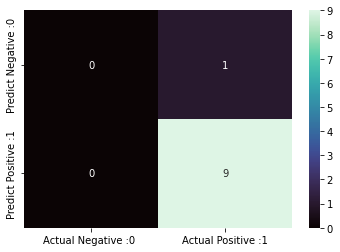

In [71]:
print("L'accuracy de la modéle avec hyperparameters par defaut {0:0.4f}".format(accuracy_score(y_test,y_pred_svm)))



from sklearn.metrics import confusion_matrix
cm=confusion_matrix( y_test ,y_pred_svm  )
cm_matrix=pd.DataFrame(data=cm , columns=['Actual Negative :0 ' , 'Actual Positive :1' ] ,
                       index=[ 'Predict Negative :0','Predict Positive :1' ])

import seaborn as sns # Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical ...
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

In [56]:
y_test

[1, 1, 1, 0, 1, 1, 1, 1, 1, 1]

In [32]:
from sklearn.metrics import classification_report

print(classification_report(y_test , y_pred_svm))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.90      1.00      0.95         9

    accuracy                           0.90        10
   macro avg       0.45      0.50      0.47        10
weighted avg       0.81      0.90      0.85        10



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<h1> KNN: </h1>

In [33]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=2)

knn.fit(X_train ,y_train)

KNeighborsClassifier(n_neighbors=2)

In [34]:
y_predict_knn=knn.predict(X_test)

L'accuracy de la modéle avec hyperparameters par defaut 0.9000


<AxesSubplot:>

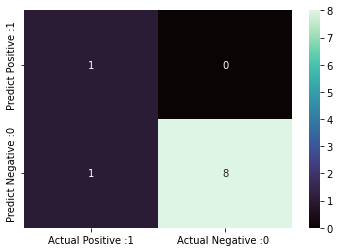

In [35]:
print("L'accuracy de la modéle avec hyperparameters par defaut {0:0.4f}".format(accuracy_score(y_test,y_predict_knn)))



from sklearn.metrics import confusion_matrix
cm1=confusion_matrix( y_test , y_predict_knn )
cm1_matrix=pd.DataFrame(data=cm1 , columns=['Actual Positive :1' ,'Actual Negative :0 '] ,
                       index=['Predict Positive :1' ,'Predict Negative :0'])

import seaborn as sns # Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical ...
sns.heatmap(cm1_matrix, annot=True, fmt='d', cmap='mako')

In [36]:
from sklearn.metrics import classification_report

print(classification_report(y_test , y_predict_knn))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.89      0.94         9

    accuracy                           0.90        10
   macro avg       0.75      0.94      0.80        10
weighted avg       0.95      0.90      0.91        10



<h1>Tree decision</h1>

In [37]:
from sklearn import tree

dt=tree.DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_predict_dt=dt.predict(X_test)

L'accuracy de la modéle avec hyperparameters par defaut 0.8000


<AxesSubplot:>

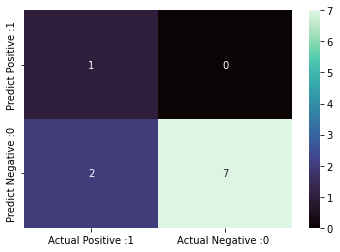

In [38]:
print("L'accuracy de la modéle avec hyperparameters par defaut {0:0.4f}".format(accuracy_score(y_test,y_predict_dt)))



from sklearn.metrics import confusion_matrix
cm2=confusion_matrix( y_test , y_predict_dt )
cm2_matrix=pd.DataFrame(data=cm2 , columns=['Actual Positive :1' ,'Actual Negative :0 '] ,
                       index=['Predict Positive :1' ,'Predict Negative :0'])

import seaborn as sns # Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical ...
sns.heatmap(cm2_matrix, annot=True, fmt='d', cmap='mako')

<h3>Compare the scores of each model</h3>

In [39]:
data =[[accuracy_score(y_test,y_pred_svm)],[accuracy_score(y_test ,y_predict_knn)],[accuracy_score(y_test,y_predict_dt)]]
header=["SVM","KNN","Decision Trees"]
print(pd.DataFrame(data,header,["Accuracy"]))

                Accuracy
SVM                  0.9
KNN                  0.9
Decision Trees       0.8


<h3>. Predict image labels in “Test/Dermoscopic_Image_Pridect” folder </h3>

In [42]:
dataTest_ImageEntiere.head(8)

,ImageName,Label
0,IMD006,NaN
1,IMD018,NaN
2,IMD088,NaN
3,IMD090,NaN
4,IMD138,NaN
5,IMD155,NaN
6,IMD164,NaN
7,IMD166,NaN


In [43]:
dataTest_ImageEntiere.shape[0]

10

In [44]:
path='ImageMiningColle\\Test\\Dermoscopic_Image'
loaded_images_predict = list()
nameImages=[]
i=0
for filename in listdir(path):
    if i !=0 :
        img_data = image.imread(path+'/' + filename)
        loaded_images_predict.append(img_data)
        
        nameImages.append(path+'/' + filename)
        
        print(' %s %s ' % (filename, img_data.shape))
    i=i+1

 IMD006.bmp (574, 765, 3) 
 IMD018.bmp (573, 765, 3) 
 IMD088.bmp (575, 764, 3) 
 IMD090.bmp (576, 767, 3) 
 IMD138.bmp (576, 767, 3) 
 IMD155.bmp (576, 767, 3) 
 IMD164.bmp (576, 767, 3) 
 IMD166.bmp (575, 764, 3) 
 IMD207.bmp (575, 764, 3) 
 IMD208.bmp (576, 768, 3) 


In [45]:
np.shape(loaded_images_predict)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


(10,)

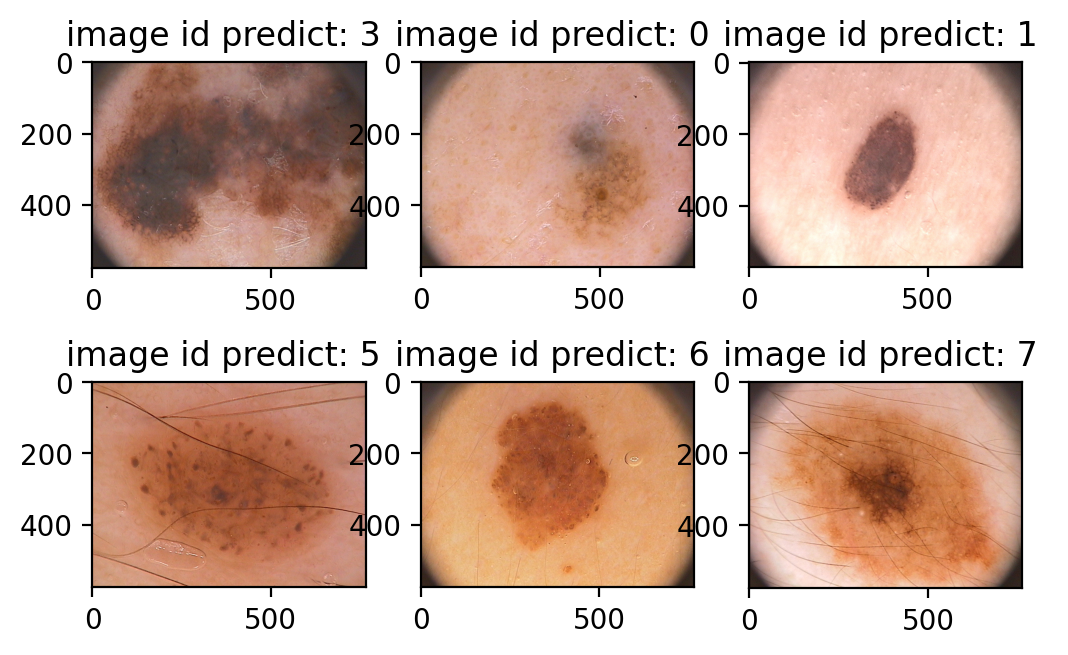

In [46]:
fig = plt.figure(figsize=(6, 6), dpi=200)

id=random.sample(range(len(loaded_images_predict)), 6)
for i in range(6):
    ax1 = fig.add_subplot(3, 3, i+1)
    ax1.imshow(loaded_images_predict[id[i]])
    ax1.set_title('image id predict: %s '% (id[i]))

In [47]:
indexation_images_predict=indexation_images(loaded_images_predict)


In [48]:
print(np.shape(indexation_images_predict))

new_data=indexation_images_predict

(10, 49)


In [49]:
y_newData_svc=svc.predict(new_data)
y_newData_knn=knn.predict(new_data)
y_newData_dt=dt.predict(new_data)

In [50]:
y_newData_svc

array([1, 1, 0, 1, 1, 1, 1, 0, 1, 1])

In [78]:
headers=[ "imagesNane", "SVM Prediction","KNN Prediction" ,"TD Prediction" ]

y_newData_svc=['Melanoma' if x==0 else 'Non-Melanoma' for x in y_newData_svc ]
y_newData_knn=['Melanoma' if x==0 else 'Non-Melanoma' for x in y_newData_knn ]
y_newData_dt= ['Melanoma' if x==0 else 'Non-Melanoma' for x in y_newData_dt  ]


In [52]:
#y_newData_svc
#y_test

In [115]:
path=np.array(dataTest_ImageEntiere).reshape((dataTest_ImageEntiere.shape[0],1))
svm=np.array(y_newData_svc).reshape((dataTest_ImageEntiere.shape[0],1))
knn=np.array(y_newData_knn).reshape((dataTest_ImageEntiere.shape[0],1))
td =np.array(y_newData_dt).reshape((dataTest_ImageEntiere.shape[0],1))

<h1>on va fusionner tous les résultat dans matrices et apres sauvgader dans fichier CSV </h1>

In [116]:
resultat_prediction=np.concatenate((path,svm,knn,td),axis=1)
resultat_prediction

array([['IMD006;', 'Non-Melanoma', 'Non-Melanoma', 'Non-Melanoma'],
       ['IMD018;', 'Non-Melanoma', 'Non-Melanoma', 'Non-Melanoma'],
       ['IMD088;', 'Melanoma', 'Melanoma', 'Melanoma'],
       ['IMD090;', 'Non-Melanoma', 'Non-Melanoma', 'Melanoma'],
       ['IMD138;', 'Non-Melanoma', 'Non-Melanoma', 'Non-Melanoma'],
       ['IMD155;', 'Non-Melanoma', 'Non-Melanoma', 'Melanoma'],
       ['IMD164;', 'Non-Melanoma', 'Non-Melanoma', 'Non-Melanoma'],
       ['IMD166;', 'Melanoma', 'Melanoma', 'Non-Melanoma'],
       ['IMD207;', 'Non-Melanoma', 'Non-Melanoma', 'Non-Melanoma'],
       ['IMD208;', 'Non-Melanoma', 'Melanoma', 'Non-Melanoma']],
      dtype=object)

In [119]:
df=pd.DataFrame(resultat_prediction ,columns= headers)

df.to_csv('test_ImageEntiere.csv')

In [120]:
afficher_resulte=pd.read_csv('test_ImageEntiere.csv')
afficher_resulte.head(30)

,Unnamed: 0,imagesNane,SVM Prediction,KNN Prediction,TD Prediction
0,0,IMD006;,Non-Melanoma,Non-Melanoma,Non-Melanoma
1,1,IMD018;,Non-Melanoma,Non-Melanoma,Non-Melanoma
2,2,IMD088;,Melanoma,Melanoma,Melanoma
3,3,IMD090;,Non-Melanoma,Non-Melanoma,Melanoma
4,4,IMD138;,Non-Melanoma,Non-Melanoma,Non-Melanoma
5,5,IMD155;,Non-Melanoma,Non-Melanoma,Melanoma
6,6,IMD164;,Non-Melanoma,Non-Melanoma,Non-Melanoma
7,7,IMD166;,Melanoma,Melanoma,Non-Melanoma
8,8,IMD207;,Non-Melanoma,Non-Melanoma,Non-Melanoma
9,9,IMD208;,Non-Melanoma,Melanoma,Non-Melanoma


<h1>======================2================================================================================</h1>
<h1>======================2================================================================================</h1>
<h1>======================2================================================================================</h1>
<h1>======================2================================================================================</h1>

<h1>Extraction of shape features from segmented lesion area</h1>

In [75]:
from os import listdir
from matplotlib import image
import cv2


def load_data(path):
    loaded_images = list()
    #path='ImageMiningColle\\Training\\Dermoscopic_Image'
    nameImages=[]
    i=0
    for filename in listdir(path):
        if i !=0 :
            img_data = cv2.imread(path+'/' + filename)
            loaded_images.append(img_data)
            
            nameImages.append(path+'/' + filename)
            #print(' %s %s ' % (filename, img_data.shape))
        i=i+1
    return loaded_images, nameImages

In [76]:
def afficher(path):
    fig = plt.figure(figsize=(6, 6), dpi=200)
    load_data1 , nameImages=load_data(path)
    
    #id=random.sample(range(len(load_data1)), 6)
    for i in range(6):
        ax1 = fig.add_subplot(3, 3, i+1)
        ax1.imshow(load_data1[i])
        ax1.set_title('image id: %s '% (i))
    return load_data1 , nameImages

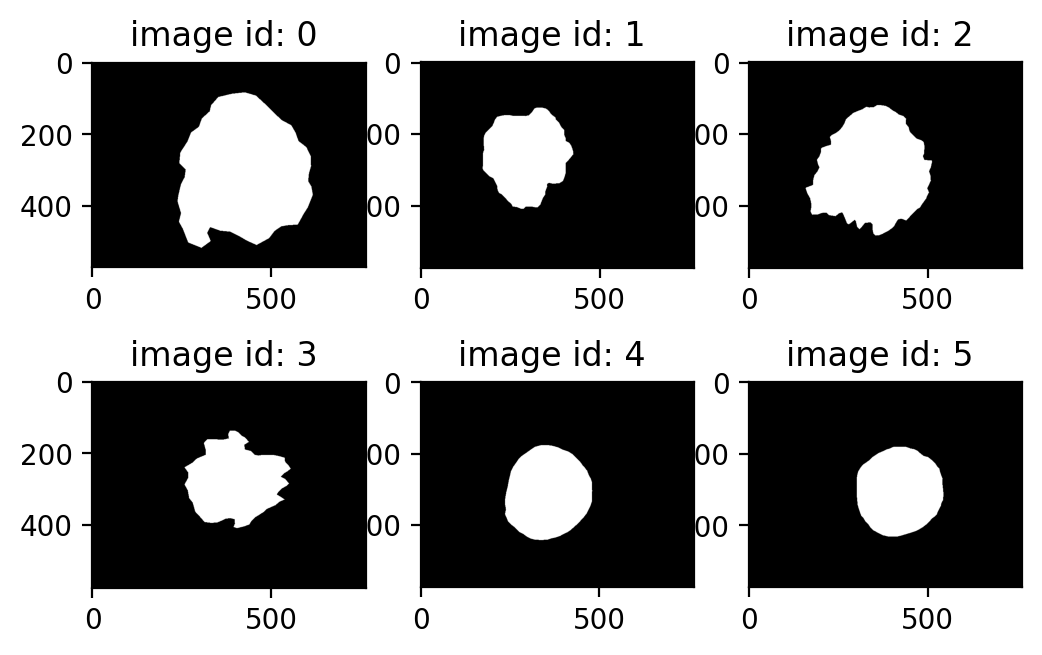

In [77]:
path1='ImageMiningColle\\Training\\Masques'

load_data_masque , nameImages_masque=afficher(path1)

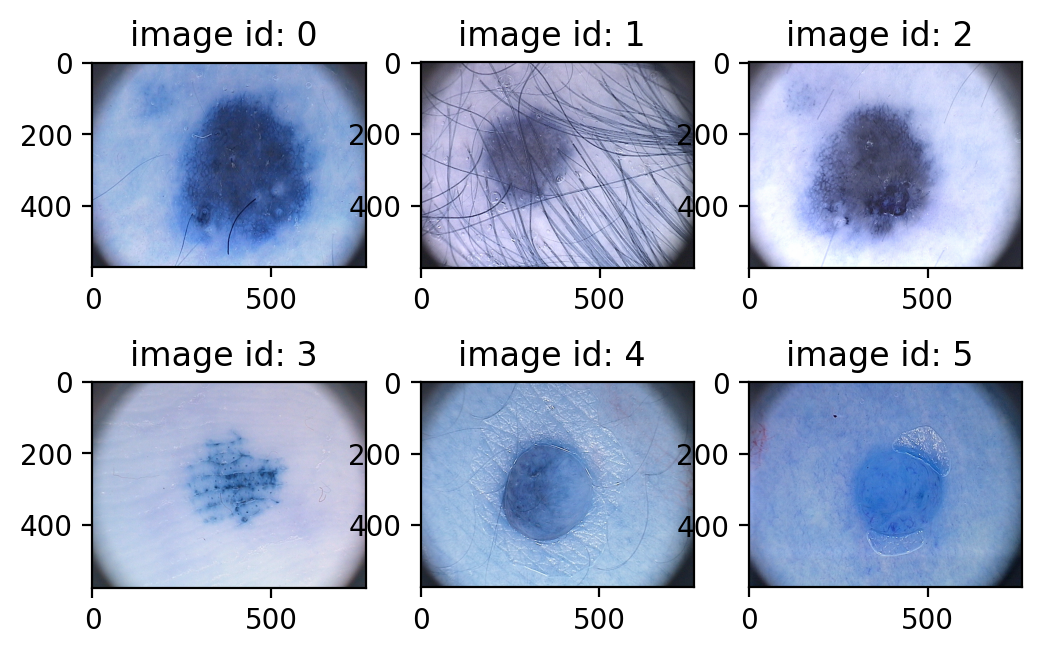

In [78]:
path2='ImageMiningColle\\Training\\Dermoscopic_Image'

load_data_entiere , nameImages_entiere=afficher(path2)

In [79]:
def subtracted_images(imgs_original , imgs_masque):
    
    loaded_images_lesion = list()
    loaded_images_peau = list()
    for i in range(len(imgs_original)):
        # la zone de la peau dans l’image originale
        loaded_images_peau.append(cv2.subtract(imgs_original[i], imgs_masque[i]))
        # la zone de la lésion dans l’image originale
        loaded_images_lesion.append(cv2.subtract(imgs_masque[i], imgs_original[i]))
    return  loaded_images_lesion ,loaded_images_peau

In [80]:


imgs_peau , imgs_lesion =subtracted_images( load_data_masque , load_data_entiere )


In [81]:
np.shape(imgs_lesion)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


(50,)

In [82]:
cv2.imshow('image lésion', imgs_lesion[23])

cv2.waitKey(0)
cv2.destroyAllWindows()

In [83]:
cv2.imshow('image peau', imgs_peau[23])

cv2.waitKey(0)
cv2.destroyAllWindows()

<h1>Caractérstique Form de la zone de la lésion et de la zone Peau</h1>

In [115]:
def index_Featurs(load_data_masque ,imgs_lesion , imgs_peau):
    
    features=[]
    j=0
    for i in range(len(load_data_masque)):
        
        FeaturesShapeMasque=getFeaturesShape(load_data_masque[i])
        #------------------------------------------------------
       
        FeaturesColorMomentsLesion= color_Moments(imgs_lesion[i])
        FeaturesColorHsvHistogramLesion=getHsvHistogramFeatures( imgs_lesion[i] )
        #------------------------------------------------------
        FeaturesTextureLesion=getFeaturesTextur(imgs_lesion[i] )
        
        #-----------------------------------------------------
        FeaturesTexturePeau=getFeaturesTextur(imgs_peau[i] )
        
        
        features.append(np.concatenate((FeaturesShapeMasque, FeaturesColorMomentsLesion,  FeaturesColorHsvHistogramLesion, FeaturesTextureLesion , FeaturesTexturePeau ) ))
        if(j==0):
            print('FeaturesShapeMasque', np.shape(FeaturesShapeMasque))
            print('FeaturesColorMomentsLesion', np.shape(FeaturesColorMomentsLesion))
            print('FeaturesColorHsvHistogramLesion', np.shape(FeaturesColorHsvHistogramLesion))
            print('FeaturesTextureLesion', np.shape(FeaturesTextureLesion))
        
            print('FeaturesTexturePeau', np.shape(FeaturesTexturePeau))
            j=j+1
    return features
    

In [116]:
indexation_images_masque=index_Featurs(load_data_masque ,imgs_lesion , imgs_peau)

FeaturesShapeMasque (7,)
FeaturesColorMomentsLesion (6,)
FeaturesColorHsvHistogramLesion (32,)
FeaturesTextureLesion (4,)
FeaturesTexturePeau (4,)


<h1>Split Data </h1>

In [117]:
#labels
X=indexation_images_masque
np.shape(Y)

(50,)

In [118]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X ,Y ,test_size=0.2 ,random_state=0 )

In [119]:
print("la dim de y_train ",np.shape(y_train))
print("la dim y_test ",np.shape(y_test))

print("la dim de X_train ",np.shape(X_train))
print("la dim X_test ",np.shape(X_test))

la dim de y_train  (40,)
la dim y_test  (10,)
la dim de X_train  (40, 53)
la dim X_test  (10, 53)


<h1>SVM</h1>

In [120]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [121]:
svc=SVC()
svc.fit(X_train,y_train)

SVC()

In [122]:
y_pred_svm=svc.predict(X_test)

L'accuracy de la modéle avec hyperparameters par defaut 0.9000


<AxesSubplot:>

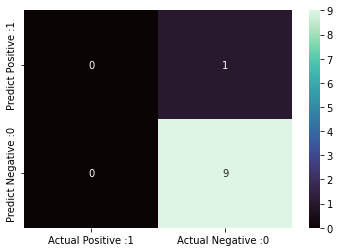

In [123]:
print("L'accuracy de la modéle avec hyperparameters par defaut {0:0.4f}".format(accuracy_score(y_test,y_pred_svm)))



from sklearn.metrics import confusion_matrix
cm=confusion_matrix( y_test , y_pred_svm )
cm_matrix=pd.DataFrame(data=cm , columns=['Actual Positive :1' ,'Actual Negative :0 '] ,
                       index=['Predict Positive :1' ,'Predict Negative :0'])

import seaborn as sns # Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical ...
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

In [124]:
from sklearn.metrics import classification_report

print(classification_report(y_test , y_pred_svm))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.90      1.00      0.95         9

    accuracy                           0.90        10
   macro avg       0.45      0.50      0.47        10
weighted avg       0.81      0.90      0.85        10



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<h1>KNN</h1>

In [125]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=2)

knn.fit(X_train ,y_train)

KNeighborsClassifier(n_neighbors=2)

In [126]:

y_predict_knn=knn.predict(X_test)

L'accuracy de la modéle avec hyperparameters par defaut 0.9000


<AxesSubplot:>

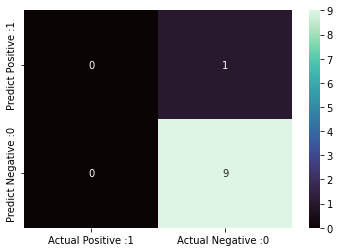

In [127]:
print("L'accuracy de la modéle avec hyperparameters par defaut {0:0.4f}".format(accuracy_score(y_test,y_predict_knn)))


from sklearn.metrics import confusion_matrix
cm1=confusion_matrix( y_test , y_predict_knn )
cm1_matrix=pd.DataFrame(data=cm1 , columns=['Actual Positive :1' ,'Actual Negative :0 '] ,
                       index=['Predict Positive :1' ,'Predict Negative :0'])

import seaborn as sns # Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical ...
sns.heatmap(cm1_matrix, annot=True, fmt='d', cmap='mako')

In [128]:
from sklearn.metrics import classification_report

print(classification_report(y_test , y_predict_knn))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.90      1.00      0.95         9

    accuracy                           0.90        10
   macro avg       0.45      0.50      0.47        10
weighted avg       0.81      0.90      0.85        10



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



<h1>Tree decision</h1>

L'accuracy de la modéle avec hyperparameters par defaut 0.9000


<AxesSubplot:>

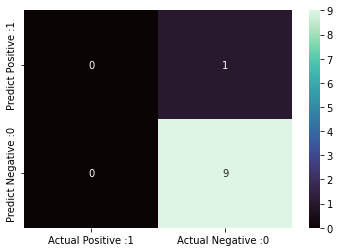

In [129]:
from sklearn import tree


dt=tree.DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_predict_dt=dt.predict(X_test)

print("L'accuracy de la modéle avec hyperparameters par defaut {0:0.4f}".format(accuracy_score(y_test,y_predict_dt)))



from sklearn.metrics import confusion_matrix
cm2=confusion_matrix( y_test , y_predict_dt )
cm2_matrix=pd.DataFrame(data=cm2 , columns=['Actual Positive :1' ,'Actual Negative :0 '] ,
                       index=['Predict Positive :1' ,'Predict Negative :0'])

import seaborn as sns # Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical ...
sns.heatmap(cm2_matrix, annot=True, fmt='d', cmap='mako')




In [130]:
y_test

[1, 1, 1, 0, 1, 1, 1, 1, 1, 1]

In [131]:
from sklearn.metrics import classification_report

print(classification_report(y_test , y_predict_dt))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.90      1.00      0.95         9

    accuracy                           0.90        10
   macro avg       0.45      0.50      0.47        10
weighted avg       0.81      0.90      0.85        10



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [132]:
data =[[accuracy_score(y_test,y_pred_svm)],[accuracy_score(y_test ,y_predict_knn)],[accuracy_score(y_test,y_predict_dt)]]
header=["SVM","KNN","Decision Trees"]
print(pd.DataFrame(data,header,["Accuracy"]))

                Accuracy
SVM                  0.9
KNN                  0.9
Decision Trees       0.9


<h3>. Predict image labels in “Test/Dermoscopic_Image_Pridect” folder </h3>


<h1>Test</h1>

In [133]:
dataTest_ImageEntiere.head(8)

,ImageName,Label
0,IMD006,NaN
1,IMD018,NaN
2,IMD088,NaN
3,IMD090,NaN
4,IMD138,NaN
5,IMD155,NaN
6,IMD164,NaN
7,IMD166,NaN


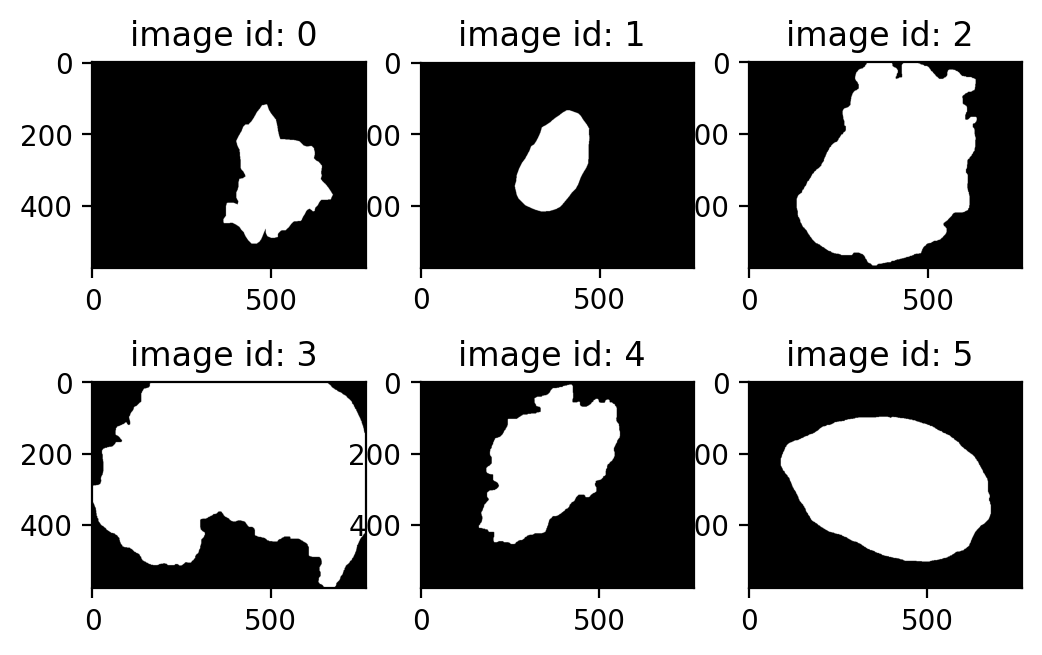

In [134]:
path_test_masque='ImageMiningColle\\Test\\Masques'

load_dataTest_masque , nameImages_masque=afficher(path_test_masque)

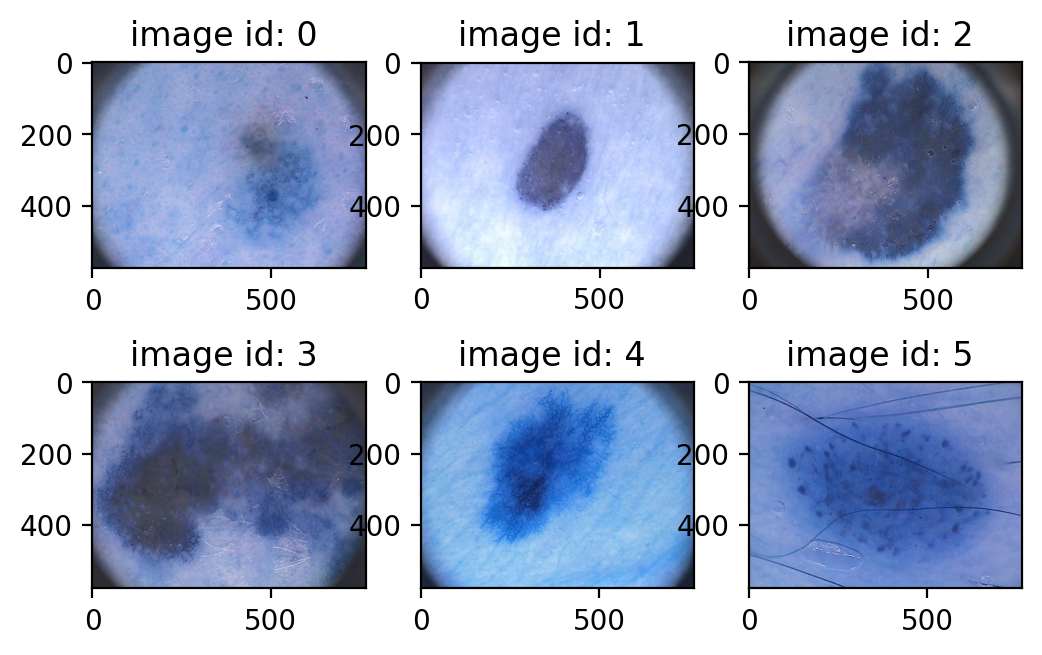

In [135]:
path_test_Original='ImageMiningColle\\Test\\Dermoscopic_Image'

load_dataTest_original , nameImages_masque=afficher(path_test_Original)

In [136]:
imgsTest_peau , imgsTest_lesion =subtracted_images( load_dataTest_masque , load_dataTest_original )

In [137]:
cv2.imshow('image lésion', imgsTest_peau[2])

cv2.waitKey(0)
cv2.destroyAllWindows()

In [139]:
index_FeatursTest=index_Featurs(load_dataTest_masque ,imgsTest_lesion  ,  imgsTest_peau)

FeaturesShapeMasque (7,)
FeaturesColorMomentsLesion (6,)
FeaturesColorHsvHistogramLesion (32,)
FeaturesTextureLesion (4,)
FeaturesTexturePeau (4,)


In [140]:
np.shape(index_FeatursTest)

(10, 53)

In [141]:
new_data=index_FeatursTest


y_newData_svc=svc.predict(new_data)
y_newData_knn=knn.predict(new_data)
y_newData_dt=dt.predict(new_data)

In [142]:
y_newData_dt

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1])

In [143]:
headers=[ "imagesNane", "SVM Prediction","KNN Prediction" ,"TD Prediction" ]

y_newData_svc=['Melanoma' if x==0 else 'Non-Melanoma' for x in y_newData_svc ]
y_newData_knn=['Melanoma' if x==0 else 'Non-Melanoma' for x in y_newData_knn ]
y_newData_dt= ['Melanoma' if x==0 else 'Non-Melanoma' for x in y_newData_dt  ]


<h1>on va fusionner tous les résultat dans matrices et apres sauvgader dans fichier CSV </h1>

In [149]:
name=np.array(dataTest_ImageEntiere.ImageName).reshape((dataTest_ImageEntiere.shape[0],1))
svm=np.array(y_newData_svc).reshape((dataTest_ImageEntiere.shape[0],1))
knn=np.array(y_newData_knn).reshape((dataTest_ImageEntiere.shape[0],1))
td =np.array(y_newData_dt).reshape((dataTest_ImageEntiere.shape[0],1))

In [150]:
resultat_prediction=np.concatenate((name,svm,knn,td),axis=1)
resultat_prediction

array([['IMD006', 'Non-Melanoma', 'Non-Melanoma', 'Non-Melanoma'],
       ['IMD018', 'Non-Melanoma', 'Non-Melanoma', 'Non-Melanoma'],
       ['IMD088', 'Non-Melanoma', 'Non-Melanoma', 'Non-Melanoma'],
       ['IMD090', 'Non-Melanoma', 'Melanoma', 'Melanoma'],
       ['IMD138', 'Non-Melanoma', 'Non-Melanoma', 'Non-Melanoma'],
       ['IMD155', 'Non-Melanoma', 'Non-Melanoma', 'Non-Melanoma'],
       ['IMD164', 'Non-Melanoma', 'Non-Melanoma', 'Non-Melanoma'],
       ['IMD166', 'Non-Melanoma', 'Non-Melanoma', 'Non-Melanoma'],
       ['IMD207', 'Non-Melanoma', 'Non-Melanoma', 'Non-Melanoma'],
       ['IMD208', 'Non-Melanoma', 'Non-Melanoma', 'Non-Melanoma']],
      dtype=object)

In [151]:
df=pd.DataFrame(resultat_prediction ,columns= headers)

df.to_csv('test_utilisantMasque.csv')

In [152]:
afficher_resulte=pd.read_csv('test_utilisantMasque.csv')
afficher_resulte.head(30)

,Unnamed: 0,imagesNane,SVM Prediction,KNN Prediction,TD Prediction
0,0,IMD006,Non-Melanoma,Non-Melanoma,Non-Melanoma
1,1,IMD018,Non-Melanoma,Non-Melanoma,Non-Melanoma
2,2,IMD088,Non-Melanoma,Non-Melanoma,Non-Melanoma
3,3,IMD090,Non-Melanoma,Melanoma,Melanoma
4,4,IMD138,Non-Melanoma,Non-Melanoma,Non-Melanoma
5,5,IMD155,Non-Melanoma,Non-Melanoma,Non-Melanoma
6,6,IMD164,Non-Melanoma,Non-Melanoma,Non-Melanoma
7,7,IMD166,Non-Melanoma,Non-Melanoma,Non-Melanoma
8,8,IMD207,Non-Melanoma,Non-Melanoma,Non-Melanoma
9,9,IMD208,Non-Melanoma,Non-Melanoma,Non-Melanoma
